<a href="https://colab.research.google.com/github/aurnam18/Additional-project/blob/master/Simple_Linear_Regression_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression (Starter Code)

Import all the required libraries

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### The Dataset

Cricket Chirp vs Temperature: Simulated data - approximates cricket chirps to temperature changes

[Link to dataset](https://www.kaggle.com/hershyandrew/cricket-chirp-vs-temperature)

The following command imports the CSV dataset using pandas

Paste the path to "Cricket_chirps.csv" below

In [4]:
dataset = pd.read_csv('Cricket_chirps.csv')

Practice checking the number of rows and columns below:

In [5]:
dataset.shape

(1499, 2)

You should receive output as (1499, 2), which means the data contains 1499 rows and 2 columns.

To see the statistical details of the dataset, we can use describe()

In [6]:
dataset.describe()

,X,Y
count,1499.000000,1499.000000
mean,76.096464,17.258839
std,8.307777,1.799267
min,62.000000,13.000000
25%,69.000000,16.000000
50%,76.000000,17.000000
75%,83.000000,18.000000
max,93.300003,22.000000


X: chirps/sec for the striped ground cricket <br />
Y: temperature in degrees Fahrenheit

### Plot the Dataset

Let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data using the below script

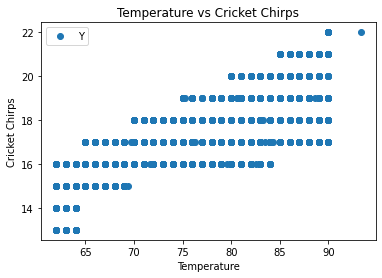

In [15]:
# Plot X and Y just like the example from Live Lesson 1
dataset.plot(x='X', y='Y', style='o')
plt.title('Temperature vs Cricket Chirps')  
plt.xlabel('Temperature')  
plt.ylabel('Cricket Chirps')  
plt.show()

We have taken Temperature and Cricket Chirps for doing our analysis. Above is a 2-D graph between Temperature and Cricket Chirps. It looks pretty linear.

### Split up the Dataset Into Attributes and Labels

Our next step is to divide the data into “attributes” and “labels”.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted.

In our dataset, we only have two columns. We want to predict the Cricket Chirps depending upon the Temperature recorded. Therefore our attribute set will consist of the “Temperature” column which is stored in the X variable, and the label will be the “Cricket Chirps” column which is stored in y variable.

In [19]:
X = dataset['X'].values.reshape(-1, 1)
y = dataset['Y'].values.reshape(-1, 1)

We use .reshape(-1,1) because dataset['Y'].values and dataset['X'].values are one-dimensional arrays, but the LinearRegression() function requires two-dimensional arrays. .reshape(-1,1) takes the data you have and converts it to a two-dimensional array.

### Split the Dataset Into Train and Test Data

We are going to use test/train split for Model Evaluation.

Next, we split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Build and Train the Model

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [22]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[5.19717806]
[[0.15792252]]


The result should be approximately 5.19717806 and 0.15792252 respectively. It might be a little different depending on the test/train split. This means that for every one unit of change in temperature, the change in the cricket chirps is about 5.197%.

### Make Predictions Using the Model

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,16,17.515134
1,18,18.352124
2,16,14.988374
3,19,17.515134
4,13,15.304219
...,...,...
295,18,19.252282
296,16,15.146297
297,17,17.041367
298,17,19.410205


We can also visualize comparison result as a bar graph using the below script:

Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

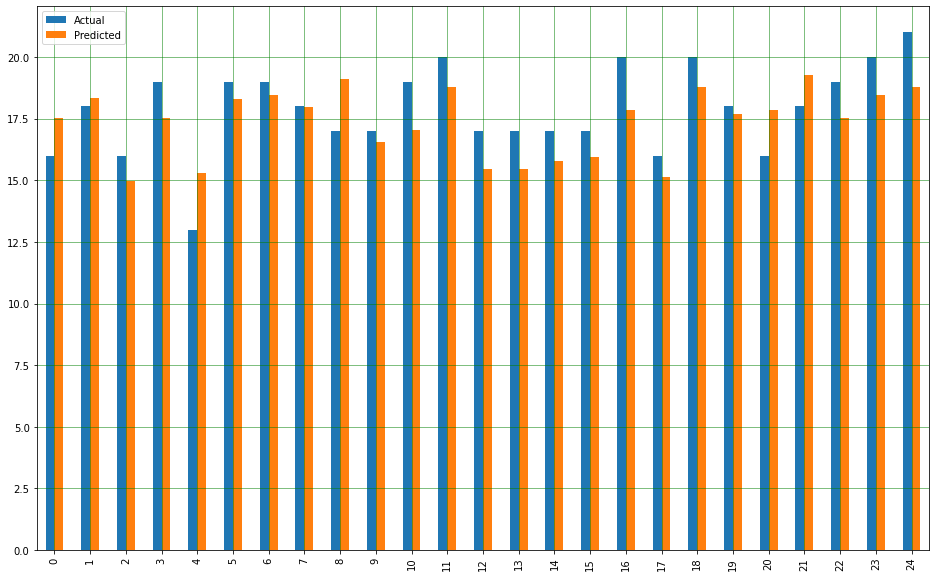

In [25]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Let's plot our straight line with the test data:

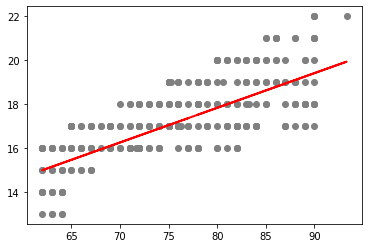

In [26]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Evaluate the Model

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors.

2. **Mean Squared Error** (MSE) is the mean of the squared errors.

3. **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors.

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0300082256839238
Mean Squared Error: 1.497012798778942
Root Mean Squared Error: 1.223524743835997


You can see that the value of root mean squared error is 1.22, which is a little less than 10% of the mean value 17.000000. This means that our algorithm is pretty good.